In [38]:

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
plt.rcParams["font.sans-serif"] = "Arial"
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
import matplotlib
matplotlib.rcParams.update({'font.size': 12})
from scipy.stats.distributions import norm
import pandas as pd
import matplotlib.dates as mdates
import pandas.plotting._converter as pandacnv
pandacnv.register()
import glob
from datetime import datetime, timedelta

In [2]:
df = pd.read_csv('JerrysRainGauge 2019-02-27 1005_5mins_2019.csv',parse_dates=False,skiprows=9)
df.head()


,Date,Time,RainFall,datetime
0,10/1/18,12:03:09 AM,0.0,10/1/18 0:03
1,10/1/18,12:08:09 AM,0.0,10/1/18 0:08
2,10/1/18,12:13:09 AM,0.0,10/1/18 0:13
3,10/1/18,12:18:09 AM,0.0,10/1/18 0:18
4,10/1/18,12:23:09 AM,0.0,10/1/18 0:23


In [3]:
df.index = pd.to_datetime(df['datetime'])

In [7]:
resampled = df.resample('15min',how='sum')

/Users/wjh/anaconda/envs/env1/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sum()
  if __name__ == '__main__':


In [8]:
resampled['cumulativeRain']=resampled['RainFall'].cumsum()

In [9]:
resampled['datetime']=resampled.index

In [23]:
resampled.to_csv('JerrysMHRain-2019-02-27.csv')

In [11]:
path =r'AVR WS data/' # use your path
allFiles = glob.glob(path + "*.CSV")

list_ = []

for file_ in allFiles:
    df = pd.read_csv(file_,index_col=None, header=0)
    df['Timestamp']=df['Timestamp'].str.replace('+', ' ')
    df['Timestamp'].drop_duplicates(inplace=True)
    df.index = pd.to_datetime(df['Timestamp'])
    df.sort_index(inplace=True)
#     print(np.diff(df['Rain']).min())
    list_.append(df)
        

frame = pd.concat(list_, axis = 0)
frame.sort_index(inplace=True)
frame.drop_duplicates(inplace=True)

In [12]:
frame['RainCorrected']=frame['Rain']
frame['RainDiff']=frame['Rain'].diff()
for index, row in frame.iterrows():
    if row['RainDiff']<0:
        frame.loc[index:]['RainCorrected'] += -row['RainDiff']
frame['RainCorrected']=frame['RainCorrected']*0.87 #Kristen's determined calibration factor        

/Users/wjh/anaconda/envs/env1/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


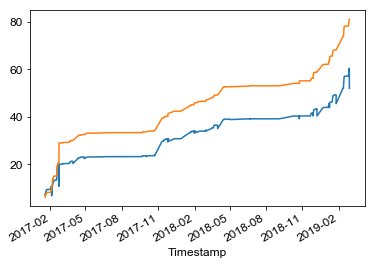

In [13]:
frame['Rain'].plot()
frame['RainCorrected'].plot()


In [14]:
frame['RainCorrected_mm']=frame['RainCorrected']*25.4

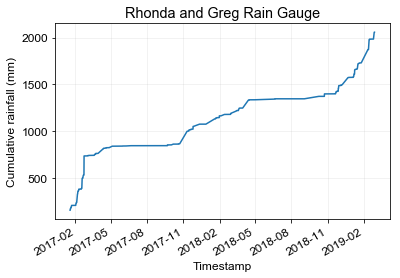

In [15]:
frame['RainCorrected_mm'].plot()
plt.title('Rhonda and Greg Rain Gauge')
plt.ylabel('Cumulative rainfall (mm)')
plt.grid(alpha=.2)
plt.savefig('Rhonda and Greg, Cumulative rainfall (mm).pdf')

In [16]:
RG_resample = frame.resample('15min',how='mean',fill_method='ffill')

/Users/wjh/anaconda/envs/env1/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: fill_method is deprecated to .resample()
the new syntax is .resample(...).mean().ffill()
  if __name__ == '__main__':


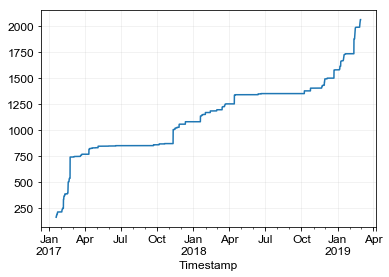

In [17]:
RG_resample['RainCorrected_mm'].plot()
plt.grid(alpha=.2)


In [18]:
RG_resample['RainCorrected_mm_per_15min']=RG_resample['RainCorrected_mm'].diff()


In [19]:
RG_resample.to_csv('RhondaGregCorrectedRainfall-2019-02-27.csv')

In [22]:
# RG_resample[RG_resample['RainCorrected_mm_per_15min']>10]

In [30]:
resampled.head()

,RainFall,cumulativeRain,datetime
datetime,,,
2018-10-01 00:00:00,0.0,0.0,2018-10-01 00:00:00
2018-10-01 00:15:00,0.0,0.0,2018-10-01 00:15:00
2018-10-01 00:30:00,0.0,0.0,2018-10-01 00:30:00
2018-10-01 00:45:00,0.0,0.0,2018-10-01 00:45:00
2018-10-01 01:00:00,0.0,0.0,2018-10-01 01:00:00


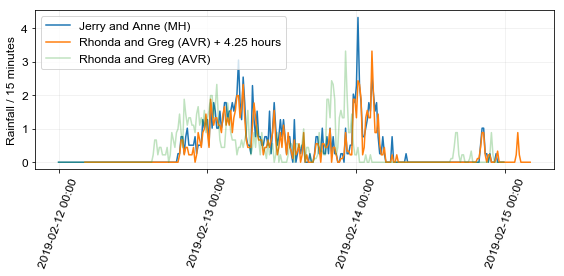

In [48]:
#Compare Rhonda and Greg vs. Jerry and Anne's gauge during 2019 storm
fig,ax = plt.subplots(1,1,figsize=(8,4), sharey=True)

plotData = resampled
ax.plot(plotData.loc['2019-02-12':'2019-02-14'].index,
           plotData.loc['2019-02-12':'2019-02-14']['RainFall'],
       label='Jerry and Anne (MH)')

plotData = RG_resample

ax.plot(plotData.loc['2019-02-12':'2019-02-14'].index+timedelta(hours=4.25),
           plotData.loc['2019-02-12':'2019-02-14']['RainCorrected_mm_per_15min'],
       label='Rhonda and Greg (AVR) + 4.25 hours')

ax.plot(plotData.loc['2019-02-12':'2019-02-14'].index,
           plotData.loc['2019-02-12':'2019-02-14']['RainCorrected_mm_per_15min'],
       label='Rhonda and Greg (AVR)',alpha=.3)


ax.grid(alpha=.2)
ax.xaxis.set_major_locator(mdates.DayLocator())

ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))

plt.sca(ax)
plt.xticks(rotation=70)

plt.ylabel('Rainfall / 15 minutes')
plt.legend()
plt.tight_layout()
plt.savefig('2019-02-LandslideStorm-RainGaugeComparison.pdf')

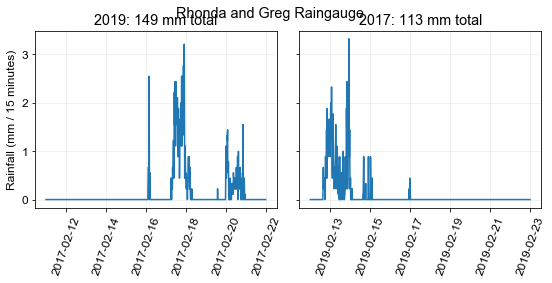

In [231]:
fig,ax = plt.subplots(1,2,figsize=(8,4), sharey=True)

plotData = RG_resample

ax[0].plot(plotData.loc['2017-02-11':'2017-02-21'].index,
           plotData.loc['2017-02-11':'2017-02-21']['RainCorrected_mm_per_15min'])
ax[0].grid(alpha=.2)

ax[1].plot(plotData.loc['2019-02-12':'2019-02-22'].index,
           plotData.loc['2019-02-12':'2019-02-22']['RainCorrected_mm_per_15min'])
ax[1].grid(alpha=.2)

for axis in ax:
    plt.sca(axis)
    plt.xticks(rotation=70)

ax[0].set_title('2019: 149 mm total')
ax[1].set_title('2017: 113 mm total')

plt.suptitle('Rhonda and Greg Raingauge ')    
ax[0].set_ylabel('Rainfall (mm / 15 minutes)')
plt.tight_layout()
plt.savefig('AVR-Raingauge-2017-2019-Comparison-15min.pdf')

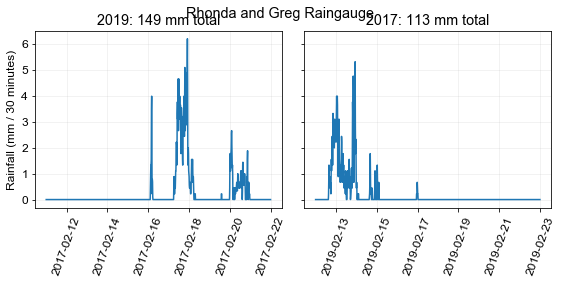

In [232]:
fig,ax = plt.subplots(1,2,figsize=(8,4), sharey=True)

plotData = RG_resample.rolling('30min').sum()


ax[0].plot(plotData.loc['2017-02-11':'2017-02-21'].index,
           plotData.loc['2017-02-11':'2017-02-21']['RainCorrected_mm_per_15min'])
ax[0].grid(alpha=.2)

ax[1].plot(plotData.loc['2019-02-12':'2019-02-22'].index,
           plotData.loc['2019-02-12':'2019-02-22']['RainCorrected_mm_per_15min'])
ax[1].grid(alpha=.2)

for axis in ax:
    plt.sca(axis)
    plt.xticks(rotation=70)

ax[0].set_title('2019: 149 mm total')
ax[1].set_title('2017: 113 mm total')

plt.suptitle('Rhonda and Greg Raingauge ')    
ax[0].set_ylabel('Rainfall (mm / 30 minutes)')
plt.tight_layout()

plt.savefig('AVR-Raingauge-2017-2019-Comparison-30min.pdf')

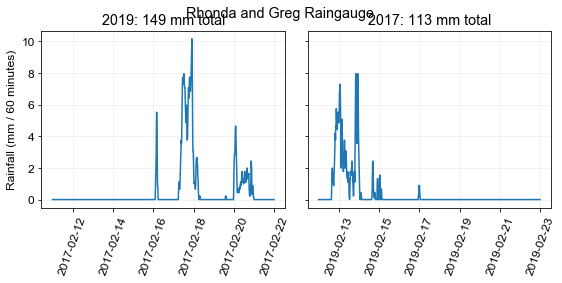

In [233]:
fig,ax = plt.subplots(1,2,figsize=(8,4), sharey=True)

plotData = RG_resample.rolling('60min').sum()


ax[0].plot(plotData.loc['2017-02-11':'2017-02-21'].index,
           plotData.loc['2017-02-11':'2017-02-21']['RainCorrected_mm_per_15min'])
ax[0].grid(alpha=.2)

ax[1].plot(plotData.loc['2019-02-12':'2019-02-22'].index,
           plotData.loc['2019-02-12':'2019-02-22']['RainCorrected_mm_per_15min'])
ax[1].grid(alpha=.2)

for axis in ax:
    plt.sca(axis)
    plt.xticks(rotation=70)

ax[0].set_title('2019: 149 mm total')
ax[1].set_title('2017: 113 mm total')

plt.suptitle('Rhonda and Greg Raingauge ')    
ax[0].set_ylabel('Rainfall (mm / 60 minutes)')
plt.tight_layout()

plt.savefig('AVR-Raingauge-2017-2019-Comparison-60min.pdf')

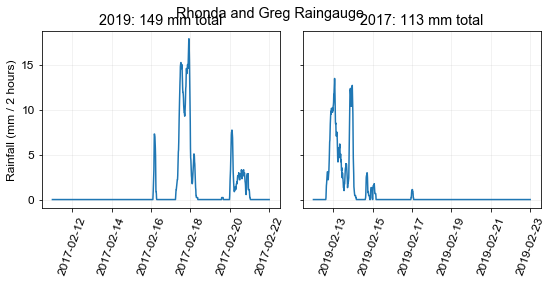

In [234]:
fig,ax = plt.subplots(1,2,figsize=(8,4), sharey=True)

plotData = RG_resample.rolling('2h').sum()


ax[0].plot(plotData.loc['2017-02-11':'2017-02-21'].index,
           plotData.loc['2017-02-11':'2017-02-21']['RainCorrected_mm_per_15min'])
ax[0].grid(alpha=.2)

ax[1].plot(plotData.loc['2019-02-12':'2019-02-22'].index,
           plotData.loc['2019-02-12':'2019-02-22']['RainCorrected_mm_per_15min'])
ax[1].grid(alpha=.2)

for axis in ax:
    plt.sca(axis)
    plt.xticks(rotation=70)

ax[0].set_title('2019: 149 mm total')
ax[1].set_title('2017: 113 mm total')

plt.suptitle('Rhonda and Greg Raingauge ')    
ax[0].set_ylabel('Rainfall (mm / 2 hours)')
plt.tight_layout()

plt.savefig('AVR-Raingauge-2017-2019-Comparison-2hours.pdf')

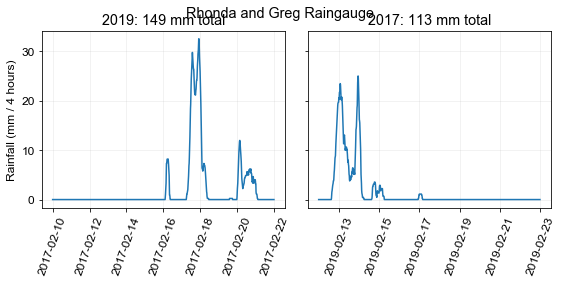

In [230]:
fig,ax = plt.subplots(1,2,figsize=(8,4), sharey=True)

plotData = RG_resample.rolling('4h').sum()


ax[0].plot(plotData.loc['2017-02-11':'2017-02-21'].index,
           plotData.loc['2017-02-11':'2017-02-21']['RainCorrected_mm_per_15min'])
ax[0].grid(alpha=.2)

ax[1].plot(plotData.loc['2019-02-12':'2019-02-22'].index,
           plotData.loc['2019-02-12':'2019-02-22']['RainCorrected_mm_per_15min'])
ax[1].grid(alpha=.2)

for axis in ax:
    plt.sca(axis)
    plt.xticks(rotation=70)

ax[0].set_title('2019: 149 mm total')
ax[1].set_title('2017: 113 mm total')

plt.suptitle('Rhonda and Greg Raingauge ')    
ax[0].set_ylabel('Rainfall (mm / 4 hours)')
plt.tight_layout()
plt.savefig('AVR-Raingauge-2017-2019-Comparison-4hours.pdf')

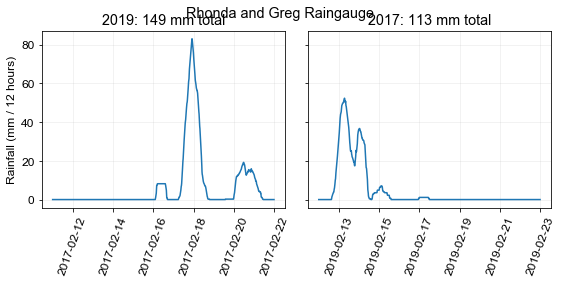

In [235]:
fig,ax = plt.subplots(1,2,figsize=(8,4), sharey=True)

plotData = RG_resample.rolling('12h').sum()


ax[0].plot(plotData.loc['2017-02-11':'2017-02-21'].index,
           plotData.loc['2017-02-11':'2017-02-21']['RainCorrected_mm_per_15min'])
ax[0].grid(alpha=.2)

ax[1].plot(plotData.loc['2019-02-12':'2019-02-22'].index,
           plotData.loc['2019-02-12':'2019-02-22']['RainCorrected_mm_per_15min'])
ax[1].grid(alpha=.2)

for axis in ax:
    plt.sca(axis)
    plt.xticks(rotation=70)

ax[0].set_title('2019: 149 mm total')
ax[1].set_title('2017: 113 mm total')

plt.suptitle('Rhonda and Greg Raingauge ')    
ax[0].set_ylabel('Rainfall (mm / 12 hours)')
plt.tight_layout()
plt.savefig('AVR-Raingauge-2017-2019-Comparison-12hours.pdf')

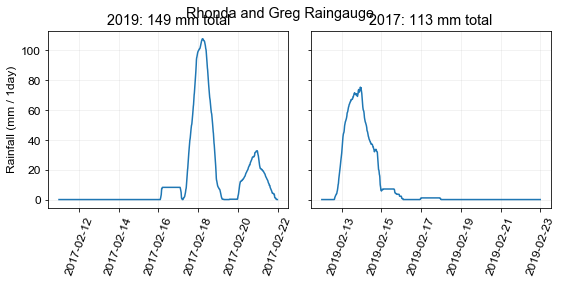

In [236]:
fig,ax = plt.subplots(1,2,figsize=(8,4), sharey=True)

plotData = RG_resample.rolling('1d').sum()


ax[0].plot(plotData.loc['2017-02-11':'2017-02-21'].index,
           plotData.loc['2017-02-11':'2017-02-21']['RainCorrected_mm_per_15min'])
ax[0].grid(alpha=.2)

ax[1].plot(plotData.loc['2019-02-12':'2019-02-22'].index,
           plotData.loc['2019-02-12':'2019-02-22']['RainCorrected_mm_per_15min'])
ax[1].grid(alpha=.2)

for axis in ax:
    plt.sca(axis)
    plt.xticks(rotation=70)

ax[0].set_title('2019: 149 mm total')
ax[1].set_title('2017: 113 mm total')

plt.suptitle('Rhonda and Greg Raingauge ')    
ax[0].set_ylabel('Rainfall (mm / 1day)')
plt.tight_layout()
plt.savefig('AVR-Raingauge-2017-2019-Comparison-1day.pdf')

In [214]:
print('2019 Total Storm Rainfall')
plotData.loc['2019-02-11':'2019-02-22']['RainCorrected_mm'].max()-plotData.loc['2019-02-11':'2019-02-22']['RainCorrected_mm'].min()



2019 Total Storm Rainfall


112.47881999999981

In [215]:
print('2017 Total Storm Rainfall')

plotData.loc['2017-02-10':'2017-02-21']['RainCorrected_mm'].max()-plotData.loc['2017-02-10':'2017-02-21']['RainCorrected_mm'].min()

2017 Total Storm Rainfall


149.16150000000005

Text(0,0.5,u'Rainfall, mm/15 minutes')

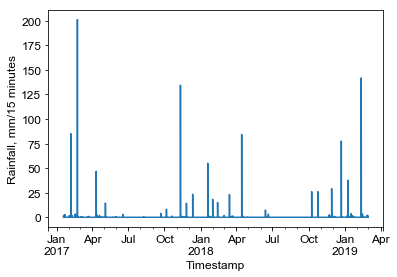

In [182]:
# RG_resample.loc['2017-02-01':'2017-02-28']['RainCorrected_mm_per_15min'].plot()
RG_resample['RainCorrected_mm_per_15min'].plot()
plt.ylabel('Rainfall, mm/15 minutes')
# plt.ylim(0,25)

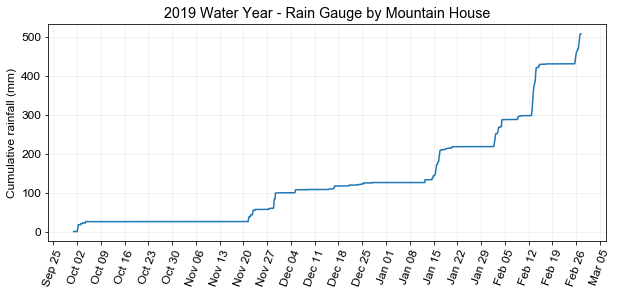

In [52]:
fig, ax = plt.subplots(1,figsize=(10,4))
plt.title('2019 Water Year - Rain Gauge by Mountain House')
plt.ylabel('Cumulative rainfall (mm)')
plt.plot(resampled['datetime'],resampled['cumulativeRain'])


ax.xaxis.set_major_locator(mdates.WeekdayLocator())
#set major ticks format
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
plt.grid(alpha=.2)
plt.xticks(rotation=70)
plt.savefig('MH-RainGauge-cumulative-2019WY.pdf')

In [248]:
resampled.loc['2019-02-12':'2019-02-22'].describe()



,RainFall,cumulativeRain
count,3168.000000,3168.000000
mean,0.041932,410.672540
std,0.146855,41.141311
min,0.000000,297.434000
25%,0.000000,420.878000
50%,0.000000,430.276000
75%,0.000000,430.276000
max,1.778000,430.276000


In [249]:
430.276000-297.434000

132.84199999999998

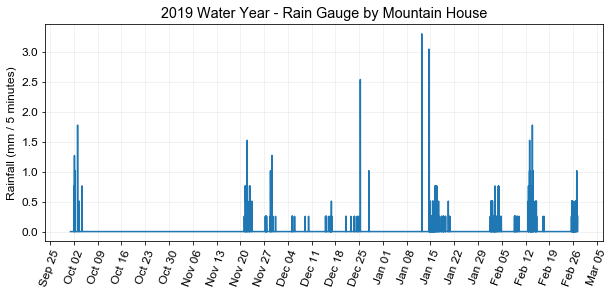

In [62]:
fig, ax = plt.subplots(1,figsize=(10,4))
plt.title('2019 Water Year - Rain Gauge by Mountain House')
plt.ylabel('Rainfall (mm / 5 minutes)')

plotData = resampled

plt.plot(plotData.index,plotData['RainFall'])
ax.xaxis.set_major_locator(mdates.WeekdayLocator())
#set major ticks format
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
plt.grid(alpha=.2)
plt.xticks(rotation=70)
plt.savefig('MH-RainGauge-5min-2019WY.pdf')

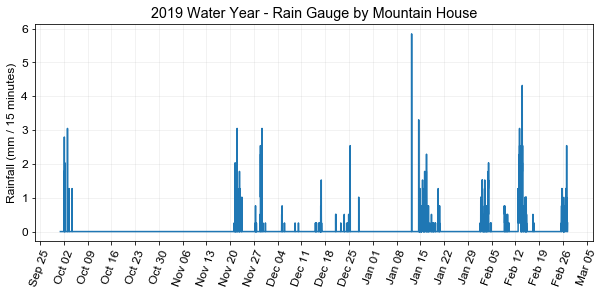

In [63]:
fig, ax = plt.subplots(1,figsize=(10,4))
plt.title('2019 Water Year - Rain Gauge by Mountain House')
plt.ylabel('Rainfall (mm / 15 minutes)')

plotData = resampled.rolling('15min').sum()

plt.plot(plotData.index,plotData['RainFall'])
ax.xaxis.set_major_locator(mdates.WeekdayLocator())
#set major ticks format
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
plt.grid(alpha=.2)
plt.xticks(rotation=70)
plt.savefig('MH-RainGauge-15min-2019WY.pdf')

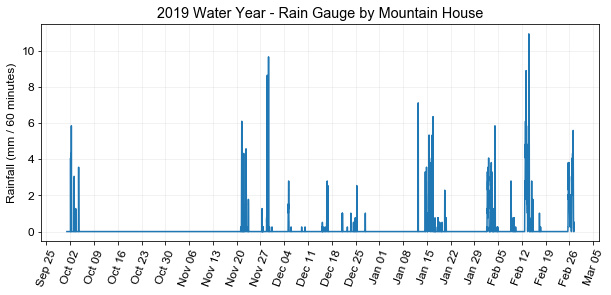

In [64]:
fig, ax = plt.subplots(1,figsize=(10,4))
plt.title('2019 Water Year - Rain Gauge by Mountain House')
plt.ylabel('Rainfall (mm / 60 minutes)')

plotData = resampled.rolling('60min').sum()

plt.plot(plotData.index,plotData['RainFall'])
ax.xaxis.set_major_locator(mdates.WeekdayLocator())
#set major ticks format
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
plt.grid(alpha=.2)
plt.xticks(rotation=70)
plt.savefig('MH-RainGauge-60min-2019WY.pdf')

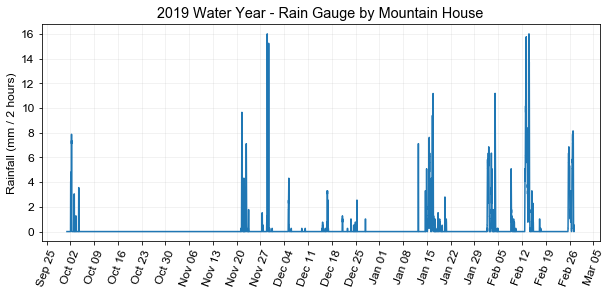

In [65]:
fig, ax = plt.subplots(1,figsize=(10,4))
plt.title('2019 Water Year - Rain Gauge by Mountain House')
plt.ylabel('Rainfall (mm / 2 hours)')

plotData = resampled.rolling('2h').sum()

plt.plot(plotData.index,plotData['RainFall'])
ax.xaxis.set_major_locator(mdates.WeekdayLocator())
#set major ticks format
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
plt.grid(alpha=.2)
plt.xticks(rotation=70)
plt.savefig('MH-RainGauge-2hours-2019WY.pdf')

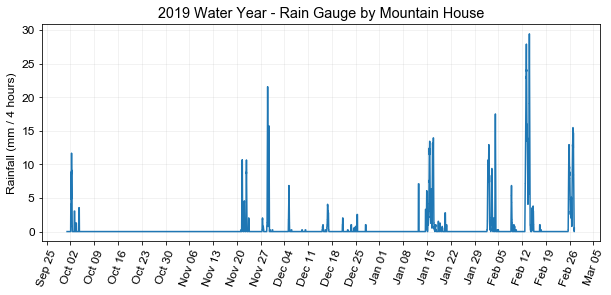

In [66]:
fig, ax = plt.subplots(1,figsize=(10,4))
plt.title('2019 Water Year - Rain Gauge by Mountain House')
plt.ylabel('Rainfall (mm / 4 hours)')

plotData = resampled.rolling('4h').sum()

plt.plot(plotData.index,plotData['RainFall'])
ax.xaxis.set_major_locator(mdates.WeekdayLocator())
#set major ticks format
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
plt.grid(alpha=.2)
plt.xticks(rotation=70)
plt.savefig('MH-RainGauge-4hours-2019WY.pdf')

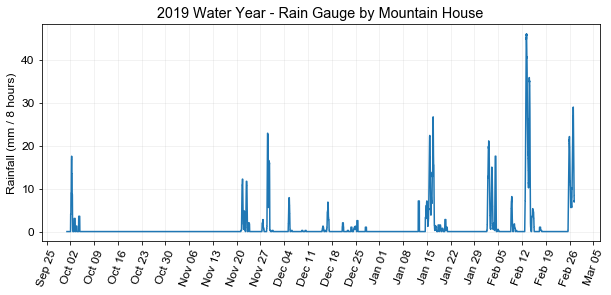

In [67]:
fig, ax = plt.subplots(1,figsize=(10,4))
plt.title('2019 Water Year - Rain Gauge by Mountain House')
plt.ylabel('Rainfall (mm / 8 hours)')

plotData = resampled.rolling('8h').sum()

plt.plot(plotData.index,plotData['RainFall'])
ax.xaxis.set_major_locator(mdates.WeekdayLocator())
#set major ticks format
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
plt.grid(alpha=.2)
plt.xticks(rotation=70)
plt.savefig('MH-RainGauge-8hours-2019WY.pdf')

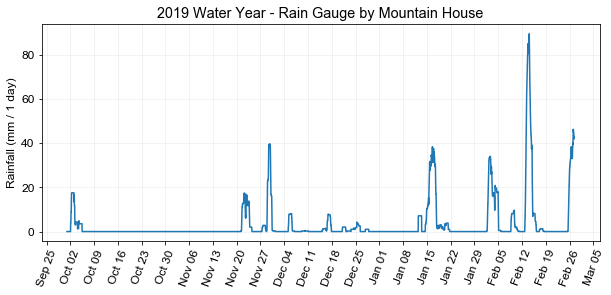

In [68]:
fig, ax = plt.subplots(1,figsize=(10,4))
plt.title('2019 Water Year - Rain Gauge by Mountain House')
plt.ylabel('Rainfall (mm / 1 day)')

plotData = resampled.rolling('1d').sum()

plt.plot(plotData.index,plotData['RainFall'])
ax.xaxis.set_major_locator(mdates.WeekdayLocator())
#set major ticks format
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
plt.grid(alpha=.2)
plt.xticks(rotation=70)
plt.savefig('MH-RainGauge-1day-2019WY.pdf')